In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ACTION_BACK = 0
ACTION_END = 1

In [4]:
# behavior policy
def behavior_policy():
    return np.random.binomial(1, 0.5)

In [5]:
# target policy
def target_policy():
    return ACTION_BACK

In [6]:
# one turn
def play():
    # track the action for importance ratio
    trajectory = []
    while True:
        action = behavior_policy()
        trajectory.append(action)
        if action == ACTION_END:
            return 0, trajectory
        if np.random.binomial(1, 0.9) == 0:
            return 1, trajectory

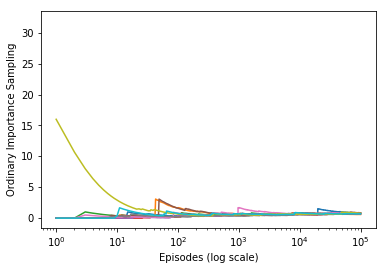

In [7]:
def figure_5_4():
    runs = 10
    episodes = 100000
    for run in range(runs):
        rewards = []
        for episode in range(0, episodes):
            reward, trajectory = play()
            if trajectory[-1] == ACTION_END:
                rho = 0
            else:
                rho = 1.0 / pow(0.5, len(trajectory))
            rewards.append(rho * reward)
        rewards = np.add.accumulate(rewards)
        estimations = np.asarray(rewards) / np.arange(1, episodes + 1)
        plt.plot(estimations)
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Ordinary Importance Sampling')
    plt.xscale('log')

    plt.show()

figure_5_4()